In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.optimize import curve_fit
from numpy import exp
from scipy import ndimage
from muse import *
from astropy.table import Table, hstack
import os
import glob
from astropy.table import Table, vstack, join
import pandas as pd
from scipy import stats

In [2]:
def p_val_table(obj,p_val,destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE"):
    column_names={'p_val':0}
    columns=[]
    for key in column_names.keys():
        columns.append(fits.Column(name=key,format='E',array=[p_val[column_names[key]]]))
    coldefs = fits.ColDefs(columns)
    hdu = fits.BinTableHDU.from_columns(coldefs)
    hdu.writeto('%s/%s/%s_pvaltab.fits'%(destination_path_cube,obj,obj),overwrite=True)

def source_name_tab(obj,destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE"):
    a1 = np.array(['%s'%(obj)])
    hdu = fits.BinTableHDU.from_columns([fits.Column(name='Source', format='20A', array=a1)])
    hdu.writeto('%s/%s/source_%s.fits'%(destination_path_cube,obj,obj),overwrite=True) 
    
def source_pval_table(obj,destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE"):
    t1 = Table.read('%s/%s/source_%s.fits'%(destination_path_cube,obj,obj),format='fits')
    t2 = Table.read('%s/%s/%s_pvaltab.fits'%(destination_path_cube,obj,obj),format='fits')
    new = hstack([t1, t2])
    new.write('%s/%s/%s_pvaltab.fits'%(destination_path_cube,obj,obj),overwrite=True)
   

In [7]:
def algorithm_script(obj,z,destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE"):
    print ('%s'%(obj))
    
    (Hb_data,Hb_model,Hb_res,OIII_br_data,OIII_br_model,OIII_br_res,OIII_nr_data,OIII_nr_model,OIII_nr_res) = loadplot('%s/%s/9_arcsec_maps_%s.fits'%(destination_path_cube,obj,obj))
    box_size = np.shape(Hb_data)[0]
    x, y = np.mgrid[:box_size, :box_size]
    if box_size>30: # in the 9" maps the length of the box with sources of spatial sampling is 45 whereas for the ones 
        radius = 5
    else:
        radius = 2
    [x0,y0] = ndimage.measurements.maximum_position(Hb_data) # Define the PSF center
    Hb_small_res = Hb_res[(x-x0)**2 + (y-y0)**2 <= radius**2]
    OIII_br_small_res = OIII_br_res[(x-x0)**2 + (y-y0)**2 <= radius**2]
    p_val = [stats.levene(Hb_small_res.ravel(),OIII_br_small_res.ravel())[1]]
    print (p_val)
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(7,7))
    bins = np.linspace(-10, 10, 50)
    plt.hist(Hb_small_res.ravel(),bins,alpha=0.5,label=r'BLR H$\beta$')
    plt.hist(OIII_br_small_res.ravel(),bins,alpha=0.5,label=r'[OIII] wing')
    plt.show()
    p_val_table(obj,p_val)
    source_name_tab(obj)
    source_pval_table(obj)

HE0021-1810
[0.18309191318027596]


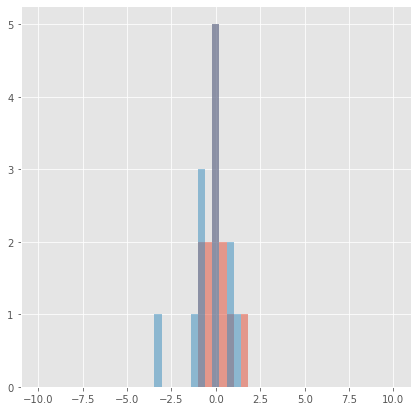

HE0021-1819
[0.0005342599274760217]


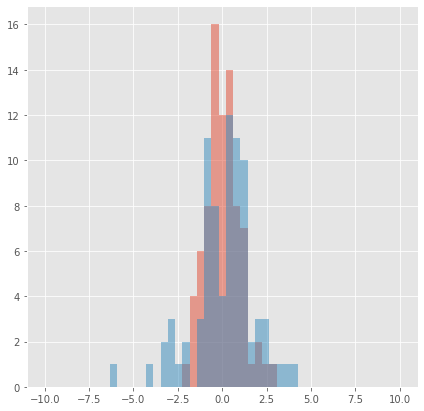

HE0040-1105
[0.8812799615197284]


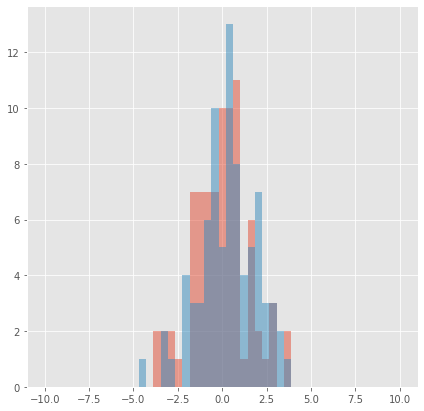

HE0108-4743
[0.004531110993782542]


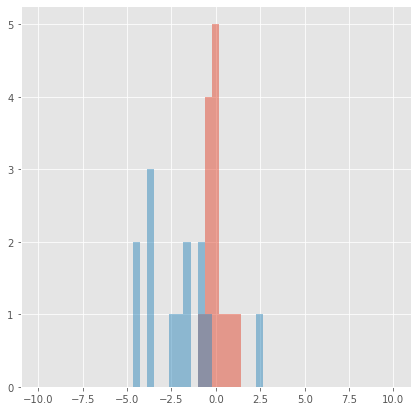

HE0114-0015
[0.695559564048819]


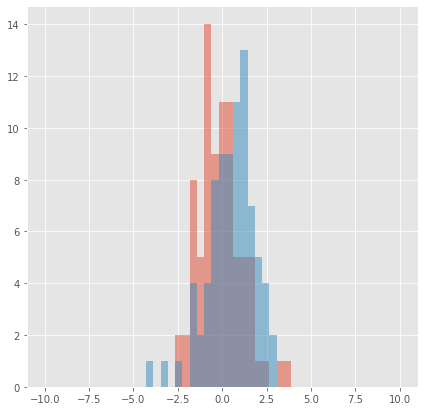

HE0119-0118
[0.08235678892808435]


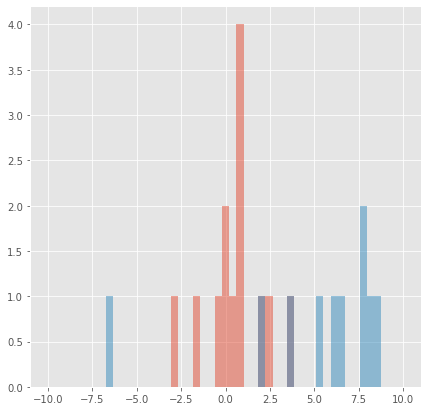

HE0212-0059
[7.679663319030117e-10]


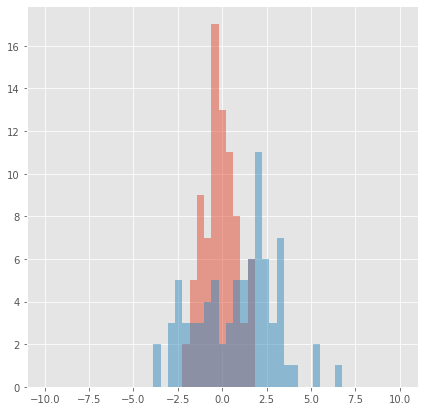

HE0224-2834
[0.546917227185558]


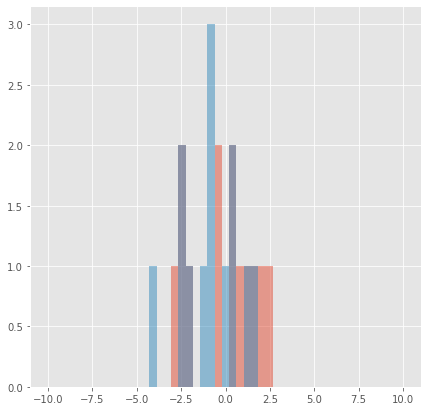

HE0227-0913
[0.023809708832021863]


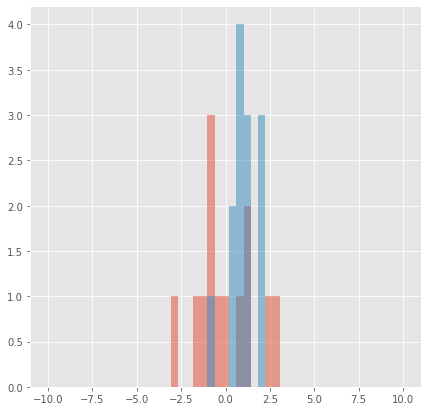

HE0232-0900
[0.00027976921375192086]


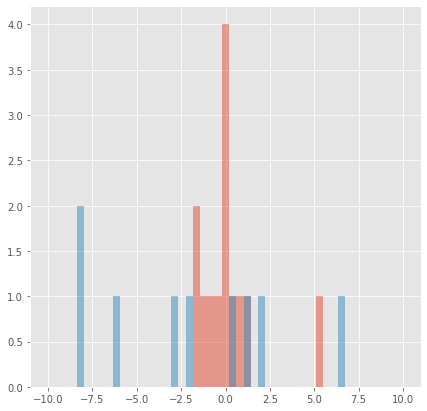

HE0253-1641
[0.3516112222621872]


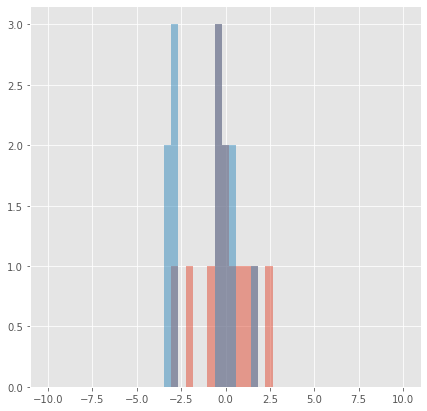

HE0345+0056
[0.5509667609920467]


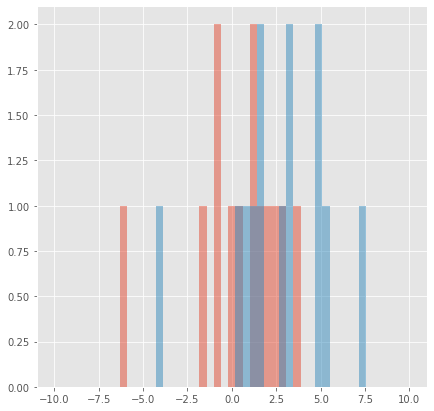

HE0351+0240
[0.05769823052592546]


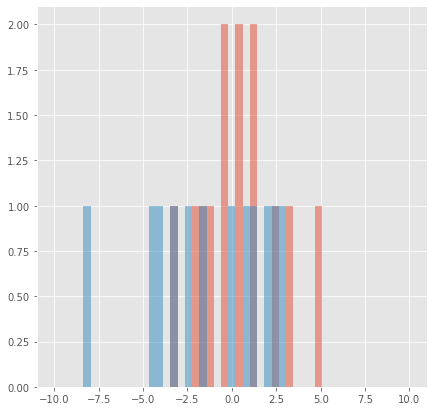

HE0412-0803
[3.4836687278745966e-07]


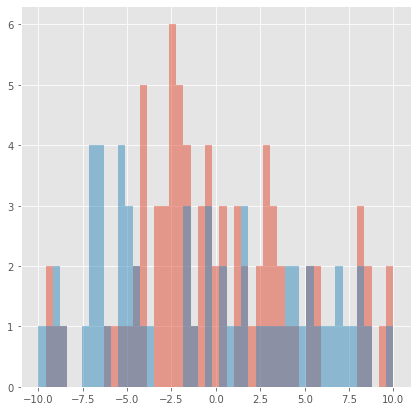

HE0429-0247
[0.26392896427444495]


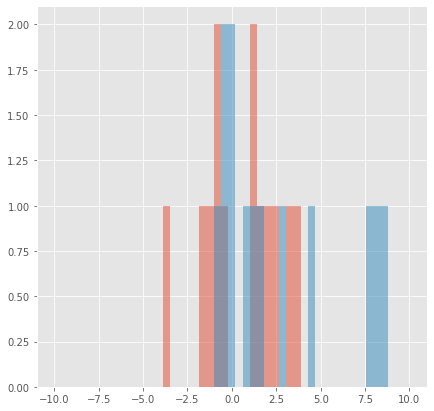

HE0433-1028
[0.00017322138312603474]


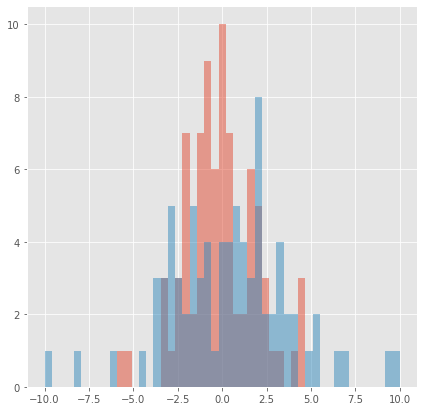

HE0853+0102
[0.41872482299163205]


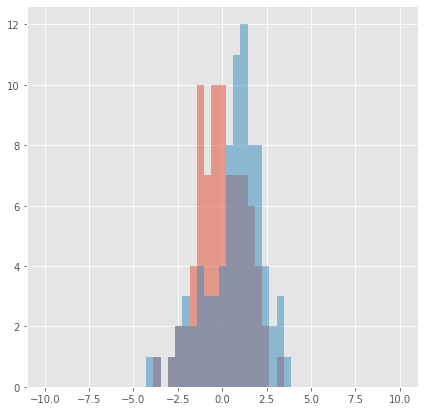

HE0934+0119
[0.007349950016795052]


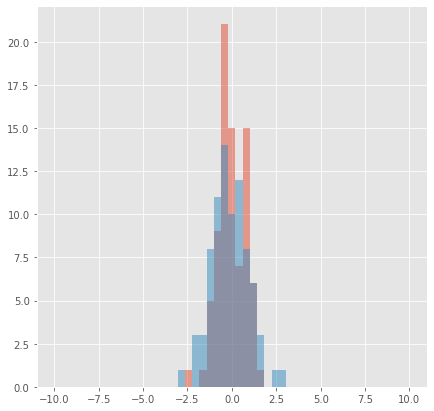

HE1011-0403
[0.6807225220799193]


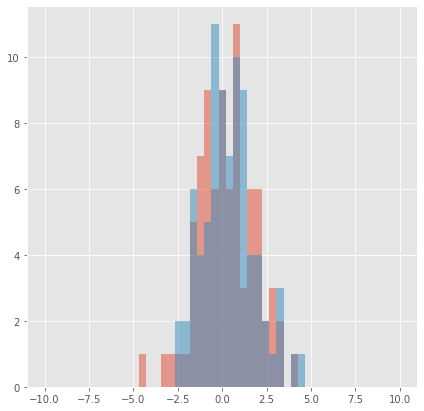

HE1017-0305
[0.009856024569008099]


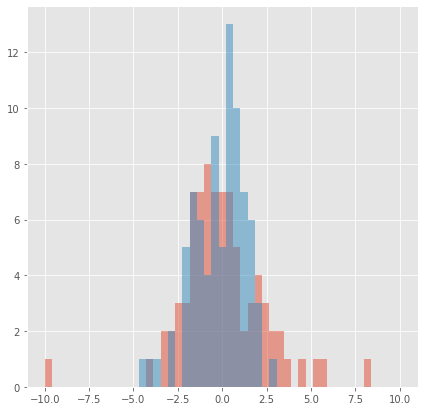

HE1029-1831
[3.063049261264133e-09]


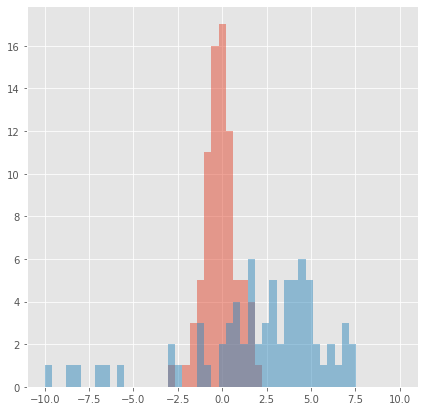

HE1107-0813
[0.4691409544940853]


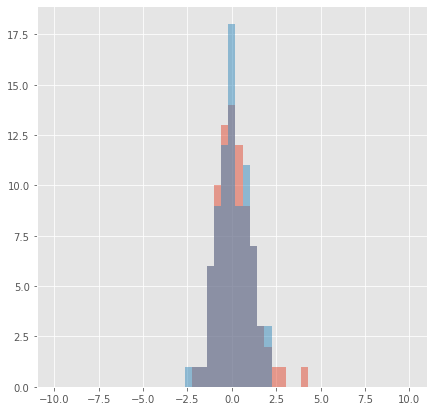

HE1108-2813
[0.7910915616711489]


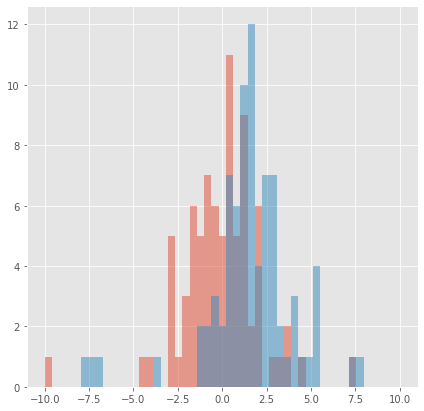

HE1126-0407
[0.2611163256467259]


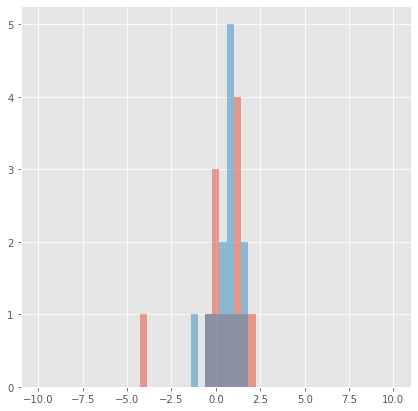

HE1237-0504
[0.022992475139875974]


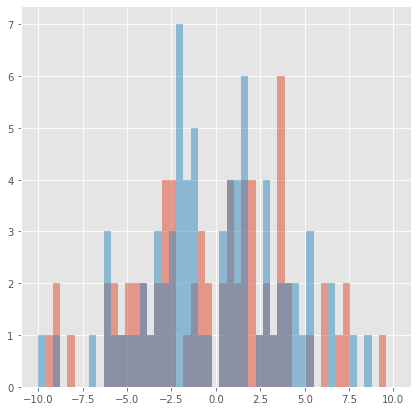

HE1248-1356
[6.478048661253352e-07]


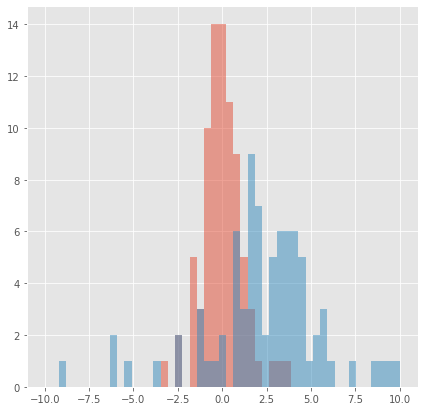

HE1330-1013
[0.7464869228269752]


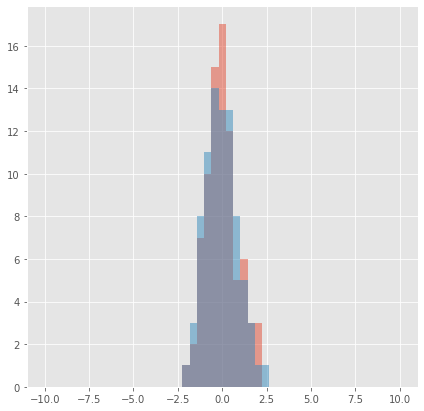

HE1353-1917
[2.7580764094978145e-13]


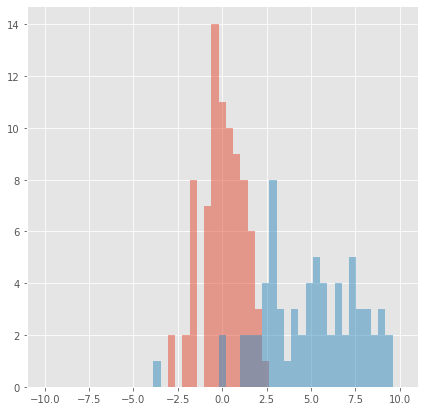

HE1417-0909
[0.28183398441719254]


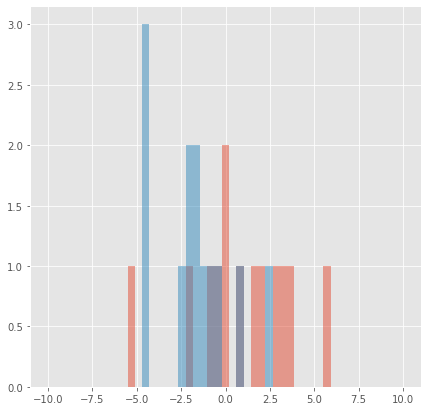

HE2128-0221
[0.16740688829765893]


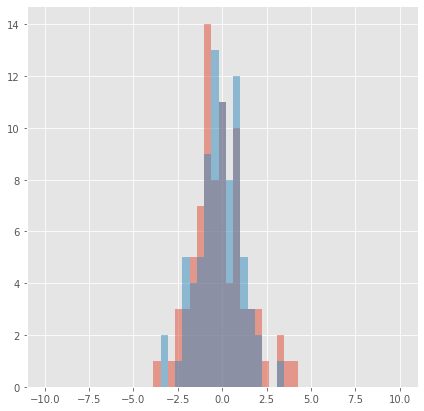

HE2211-3903
[0.006126667023174288]


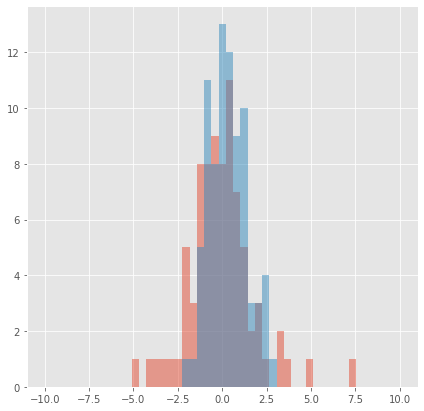

HE2222-0026
[0.013389892734043984]


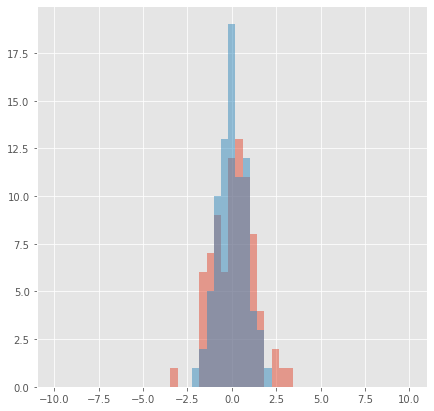

HE2233+0124
[0.4931687531068386]


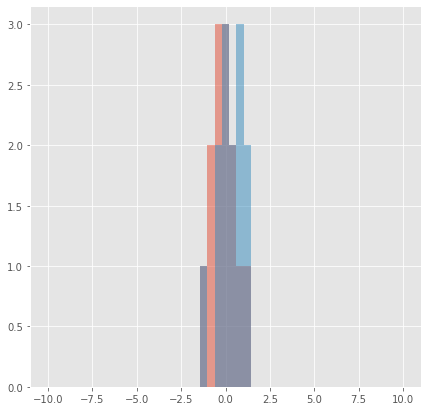

HE2302-0857
[6.718905579681027e-05]


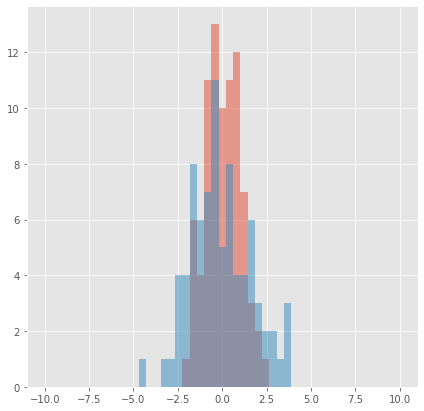

In [8]:
z = {"HE0021-1810":0.05352,"HE0021-1819":0.053197,"HE0040-1105":0.041692,"HE0108-4743":0.02392,"HE0114-0015":0.04560
    ,"HE0119-0118":0.054341,"HE0212-0059":0.026385,"HE0224-2834":0.059800,"HE0227-0913":0.016451,"HE0232-0900":0.043143
    ,"HE0253-1641":0.031588,"HE0345+0056":0.031,"HE0351+0240":0.036,"HE0412-0803":0.038160,"HE0429-0247":0.042009
    ,"HE0433-1028":0.035550,"HE0853+0102":0.052,"HE0934+0119":0.050338,"HE1011-0403":0.058314,"HE1017-0305":0.049986
    ,"HE1029-1831":0.040261,"HE1107-0813":0.058,"HE1108-2813":0.024013,"HE1126-0407":0.061960,"HE1237-0504":0.009
    ,"HE1248-1356":0.01465,"HE1330-1013":0.022145,"HE1353-1917":0.035021,"HE1417-0909":0.044,"HE2128-0221":0.05248
    ,"HE2211-3903":0.039714,"HE2222-0026":0.059114,"HE2233+0124":0.056482,"HE2302-0857":0.046860}


#z_remaining = {"HE2128-0221":0.05248,"HE1248-1356":0.01465}

objs = z.keys()    


for obj in objs:
    algorithm_script(obj,z[obj])